In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import solve_ivp

In [2]:
def Θ(x, x_rev, λ, θ):
    xk, xj = np.meshgrid(x, x)
    return (xj - x_rev)/(1 + np.exp(-λ*(xk - θ)))

In [3]:
def hr_dots(current, _,
            b, i0, x_rev, λ, θ, μ, s, x_rest):
    x, y, z = current
    theta = Θ(x, x_rev, λ, θ)
    dots = np.zeros_like(current)
    dots[0] = y - (x**3) + b*(x**2) + i0 - z
    dots[1] = 1 - 5*(x**2) - y
    dots[2] = μ*(s*(x - x_rest) - z)
    return dots

In [4]:
# SPECIFIC PARAMETERS
b = 3.2                            # Controls spiking frequency
# Input current --- An array to add noise
i0 = 4.4
x_rev = 2                          # Reverse potential
λ = 10                             # Sigmoidal function parameter
θ = -0.25                          # Sigmoidal function parameter
μ = 0.01                           # Time scale of slow current
# Governs adaptation (whatever that means)
s = 4.0
x_rest = -1.6                      # Resting potential --- INCORRECT IN SANTOS PAPER

In [5]:
ivs = np.zeros(3)    # Initial values [[x], [y], [z]]
ivs[0] = 3.0*np.random.random() - 1.0
ivs[1] = 0.2*np.random.random()
ivs[2] = 0.2*np.random.random()

In [6]:
tmax = 400
N = 100*tmax
t = np.linspace(0, tmax, N)

In [10]:
%%time
params = (b, i0, x_rev, λ, θ, μ, s, x_rest)
print("Finding solution... ", end=" ")
sol = solve_ivp(fun=lambda t_in, y_in: hr_dots(y_in, t_in, *params),
                t_span=(-200, tmax), t_eval=t, y0=ivs, method="RK45")
print("Found solution")

Finding solution...  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Found solution
CPU times: user 1.13 s, sys: 20.7 ms, total: 1.15 s
Wall time: 1.19 s


In [11]:
sol.y.shape

(3, 40000)

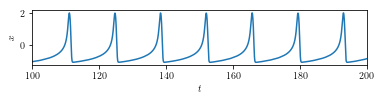

In [12]:
tm, tx = 10_000, 20_000
plt.plot(sol.t[tm:tx], sol.y[0, tm:tx])
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.xlim([sol.t[tm], sol.t[tx]])
plt.gcf().set_size_inches(6, 1)

plt.savefig("../figure/action_potential", dpi=700, bbox_inches="tight")

In [13]:
from scipy.signal import argrelmax

In [14]:
maxes = sol.t[argrelmax(sol.y[0])[0]]

In [15]:
maxes

array([  4.280107  ,  17.18042951,  30.27075677,  43.68109203,
        56.99142479,  70.40176004,  83.8920973 ,  97.57243931,
       111.09277732, 124.72311808, 138.33345834, 151.99379984,
       165.69414235, 179.39448486, 192.97482437, 206.63516588,
       220.18550464, 233.84584615, 247.5561889 , 261.25653141,
       274.83687092, 288.47721193, 302.02755069, 315.73789345,
       329.46823671, 343.07857696, 356.64891622, 370.31925798,
       383.94959874, 397.5799395 ])

In [16]:
(maxes[1:] - maxes[:-1])

array([12.90032251, 13.09032726, 13.41033526, 13.31033276, 13.41033526,
       13.49033726, 13.68034201, 13.52033801, 13.63034076, 13.61034026,
       13.66034151, 13.70034251, 13.70034251, 13.58033951, 13.66034151,
       13.55033876, 13.66034151, 13.71034276, 13.70034251, 13.58033951,
       13.64034101, 13.55033876, 13.71034276, 13.73034326, 13.61034026,
       13.57033926, 13.67034176, 13.63034076, 13.63034076])